Import the 🦸🏾‍♀️"Avengers"🦹🏻 data from the [FiveThirtyEight data repository on GitHub](https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv).

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
avengers = read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv")

Rows: 173 Columns: 21

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): URL, Name/Alias, Current?, Gender, Probationary Introl, Full/Reser...
dbl  (3): Appearances, Year, Years since joining


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Make an ECDF plot 📊 of `Appearances`.

(❗️Hint: combine `arrange`, `mutate` and `row_number`/`rank` to produce a new column to encode with y-position.)

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'ypos' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(cap

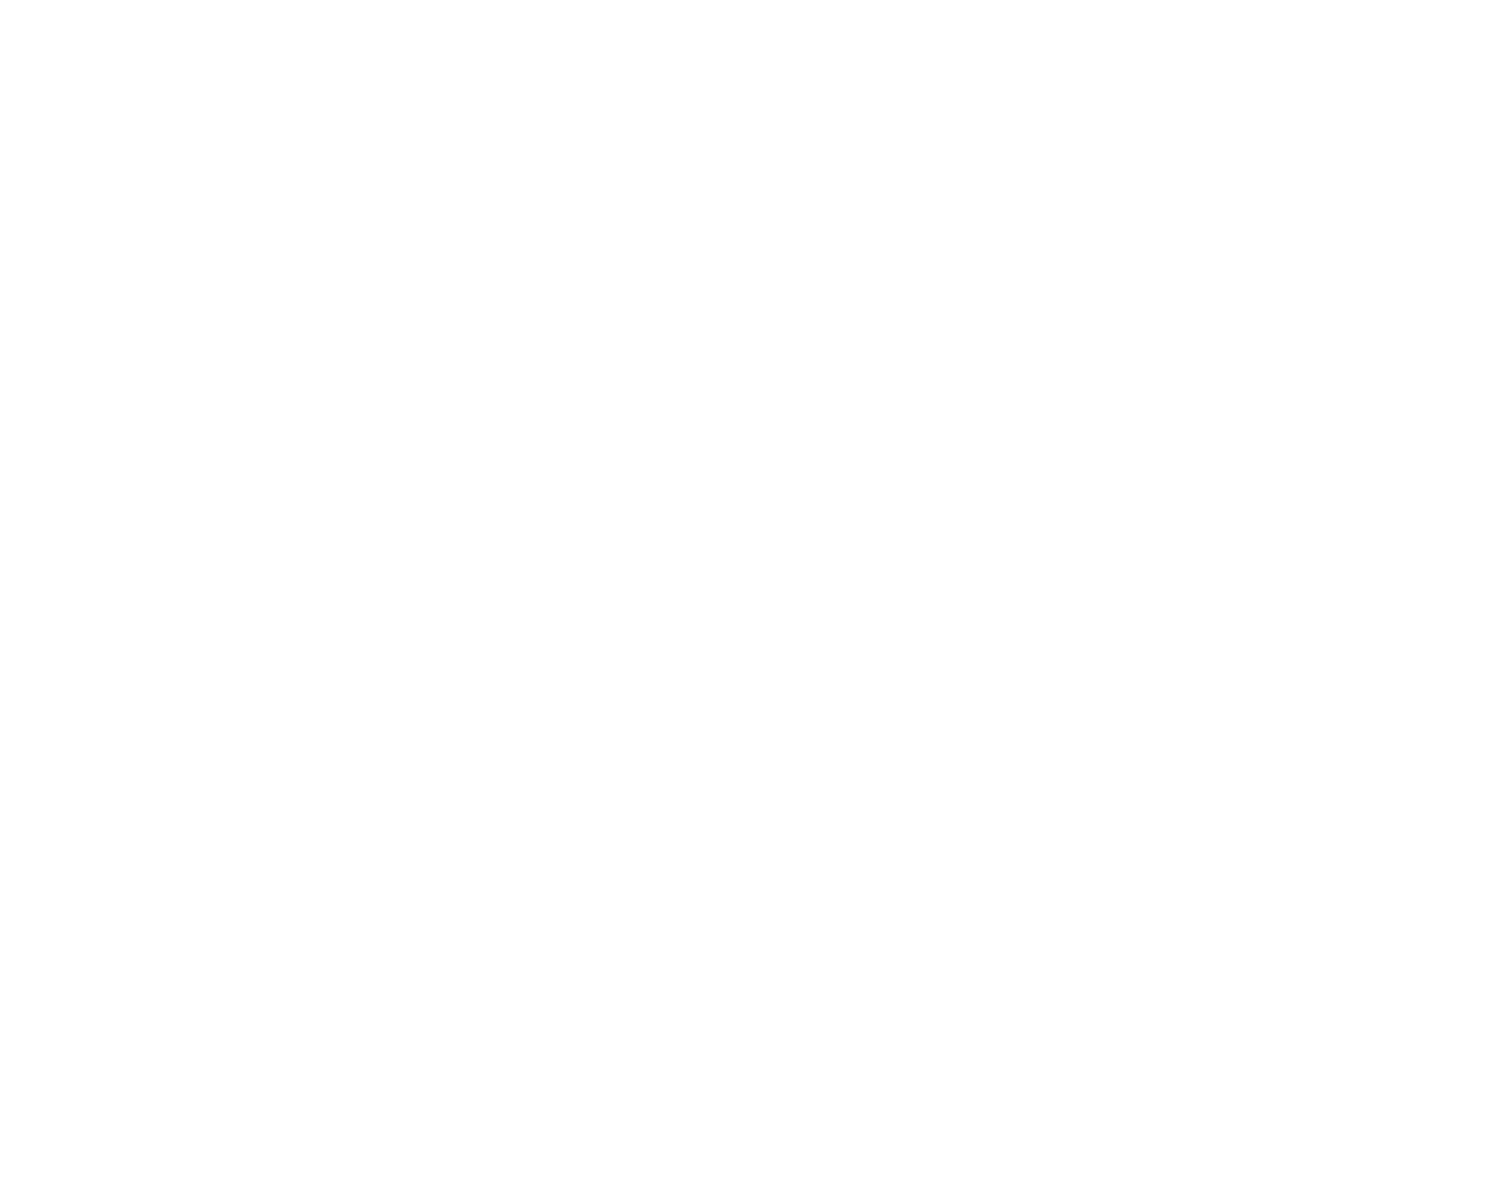

In [15]:
avengers2 = avengers |>
    mutate(ypos = rank(Appearances, ties.method = 'first') / n()) |>
    select(`Name/Alias`, Appearances, ypos) |>
    arrange(desc(ypos))

avengers3 = avengers |>
    select(`Name/Alias`, Appearances) |>
    arrange(Appearances) |>
    mutate(ypos = row_number() / n())

Name/Alias,Appearances,ypos
<chr>,<dbl>,<dbl>
Moira Brandon,2,0.005780347
Fiona,2,0.011560694
Doug Taggert,3,0.017341040
Gene Lorrene,4,0.023121387
Dennis Sykes,6,0.028901734
NA,7,0.034682081


<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'ypos' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(cap

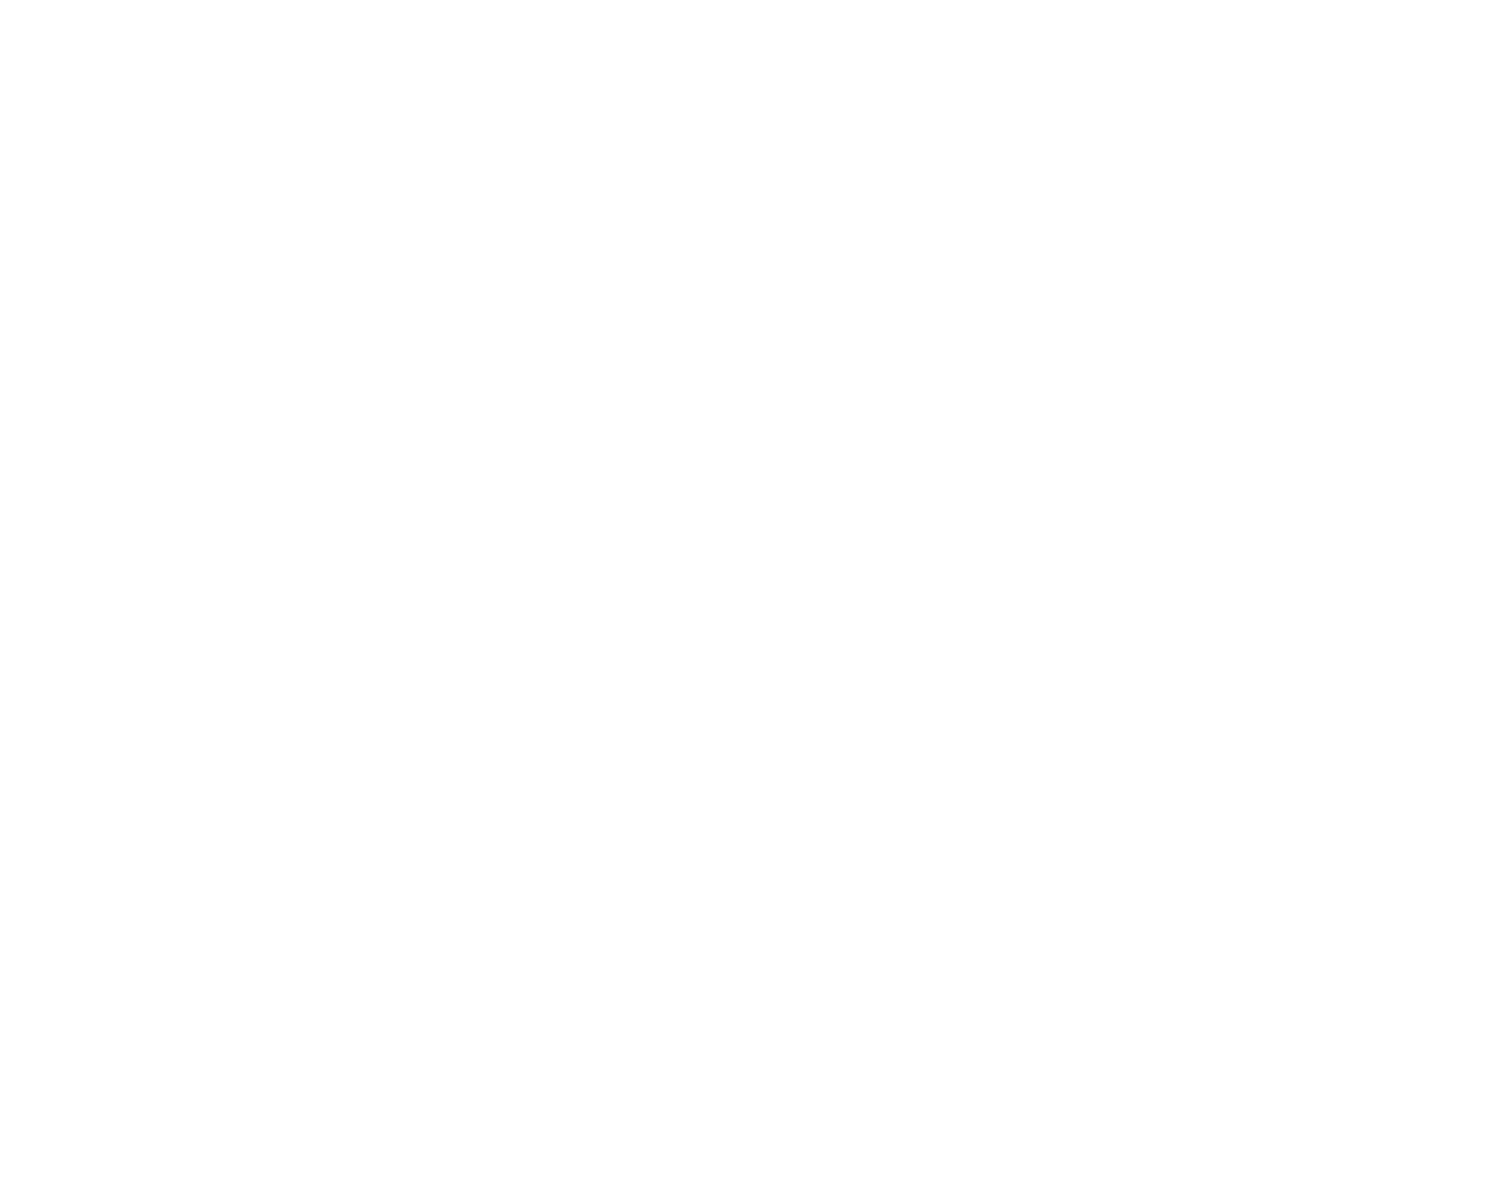

In [18]:
# create a variable which we will use for the y axis rank by descending y position 
avengers3 |> 
    mutate(ypos = rank(Appearances, ties.method = 'first') / n()) |> 
    select('Name/Alias', Appearances, ypos) |> 
    head()

p = ggplot(avengers, aes(x = Appearances, y = ypos)) + geom_line() + geom_point()
scale_y_continuous(labels = scales::percent_format())
p

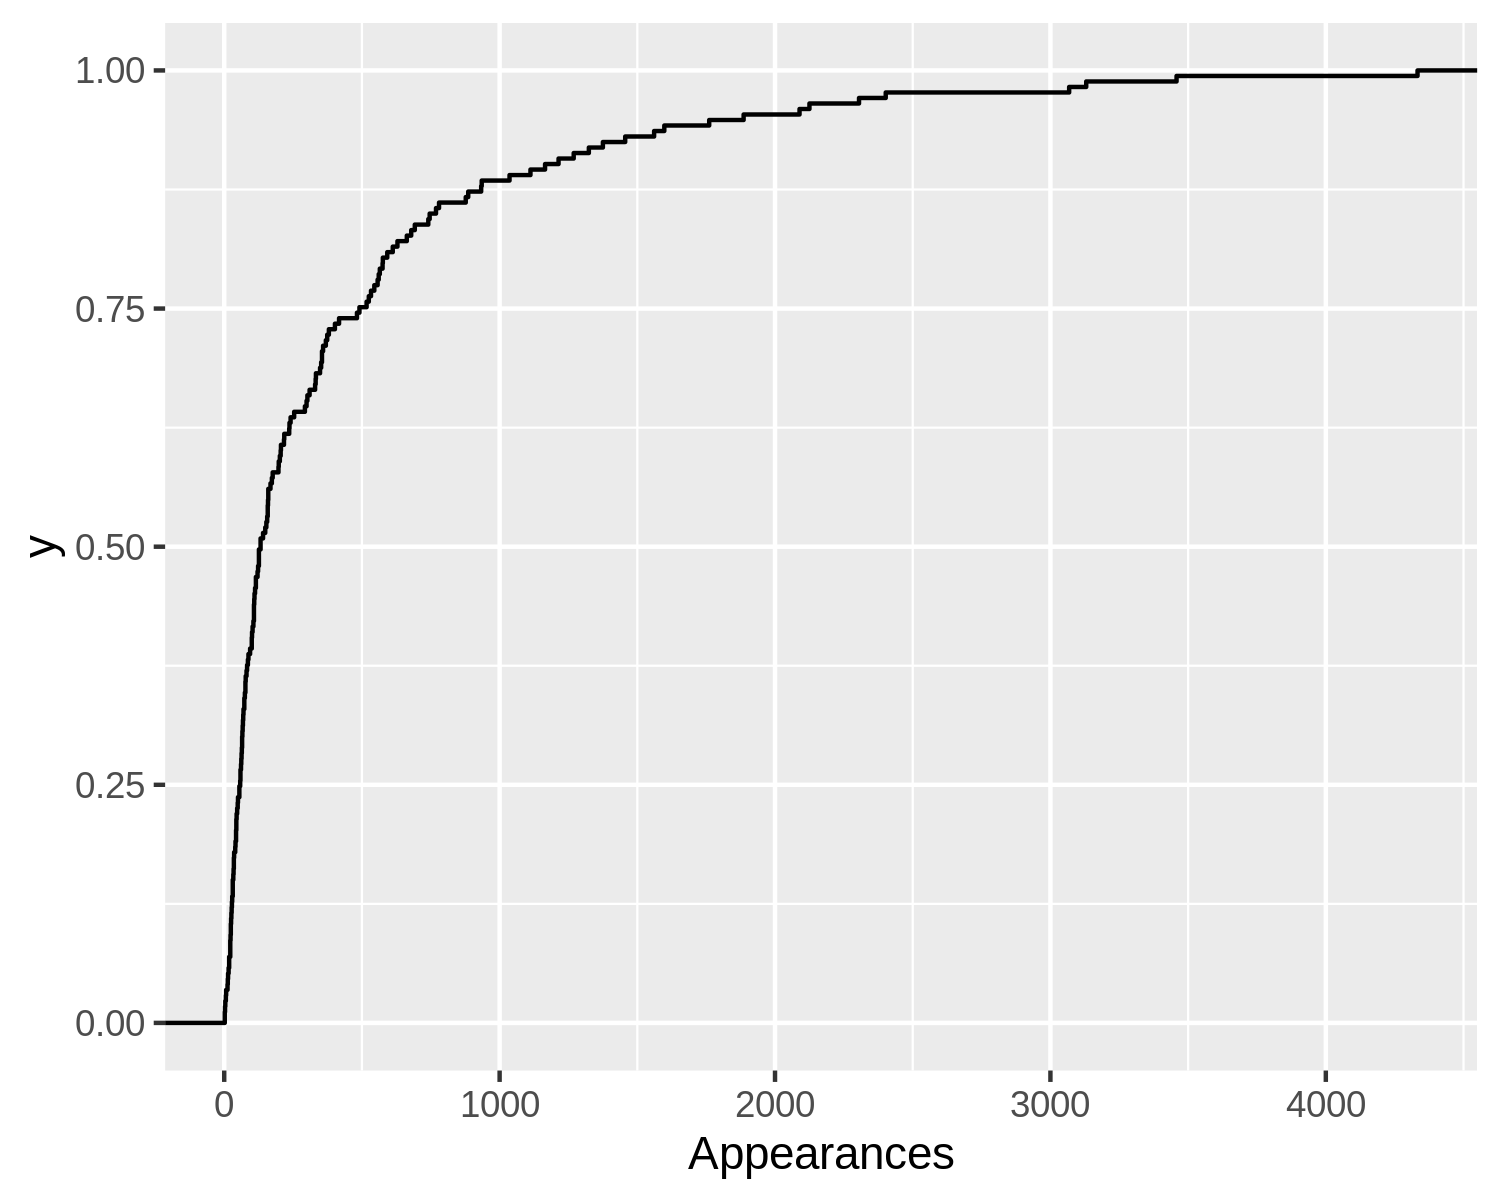

In [6]:
# you can also use the stat_ecdf command, if you don't want to specify the y axis - it will do it for you!
p = ggplot(avengers, aes(x = Appearances)) + stat_ecdf() 
p

In [20]:
# filter based on the data within a column 
avengers3 |> 
    filter(ypos > 0.80, ypos <0.85) 

#let's annotate our chart based on this filter 
#create a single row table with this info 
highlight = avengers3 |> filter(`Name/Alias` == 'James Buchanan Barnes') 

Name/Alias,Appearances,ypos
<chr>,<dbl>,<dbl>
Samuel Thomas Wilson,576,0.8034682
Alex Summers,592,0.8092486
Richard Milhouse Jones,612,0.8150289
Daniel Thomas Rand K'ai,629,0.8208092
James Buchanan Barnes,663,0.8265896
Samuel Guthrie,679,0.8323699
Simon Williams,692,0.8381503
Heracles,741,0.8439306
Flash Thompson,746,0.8497110


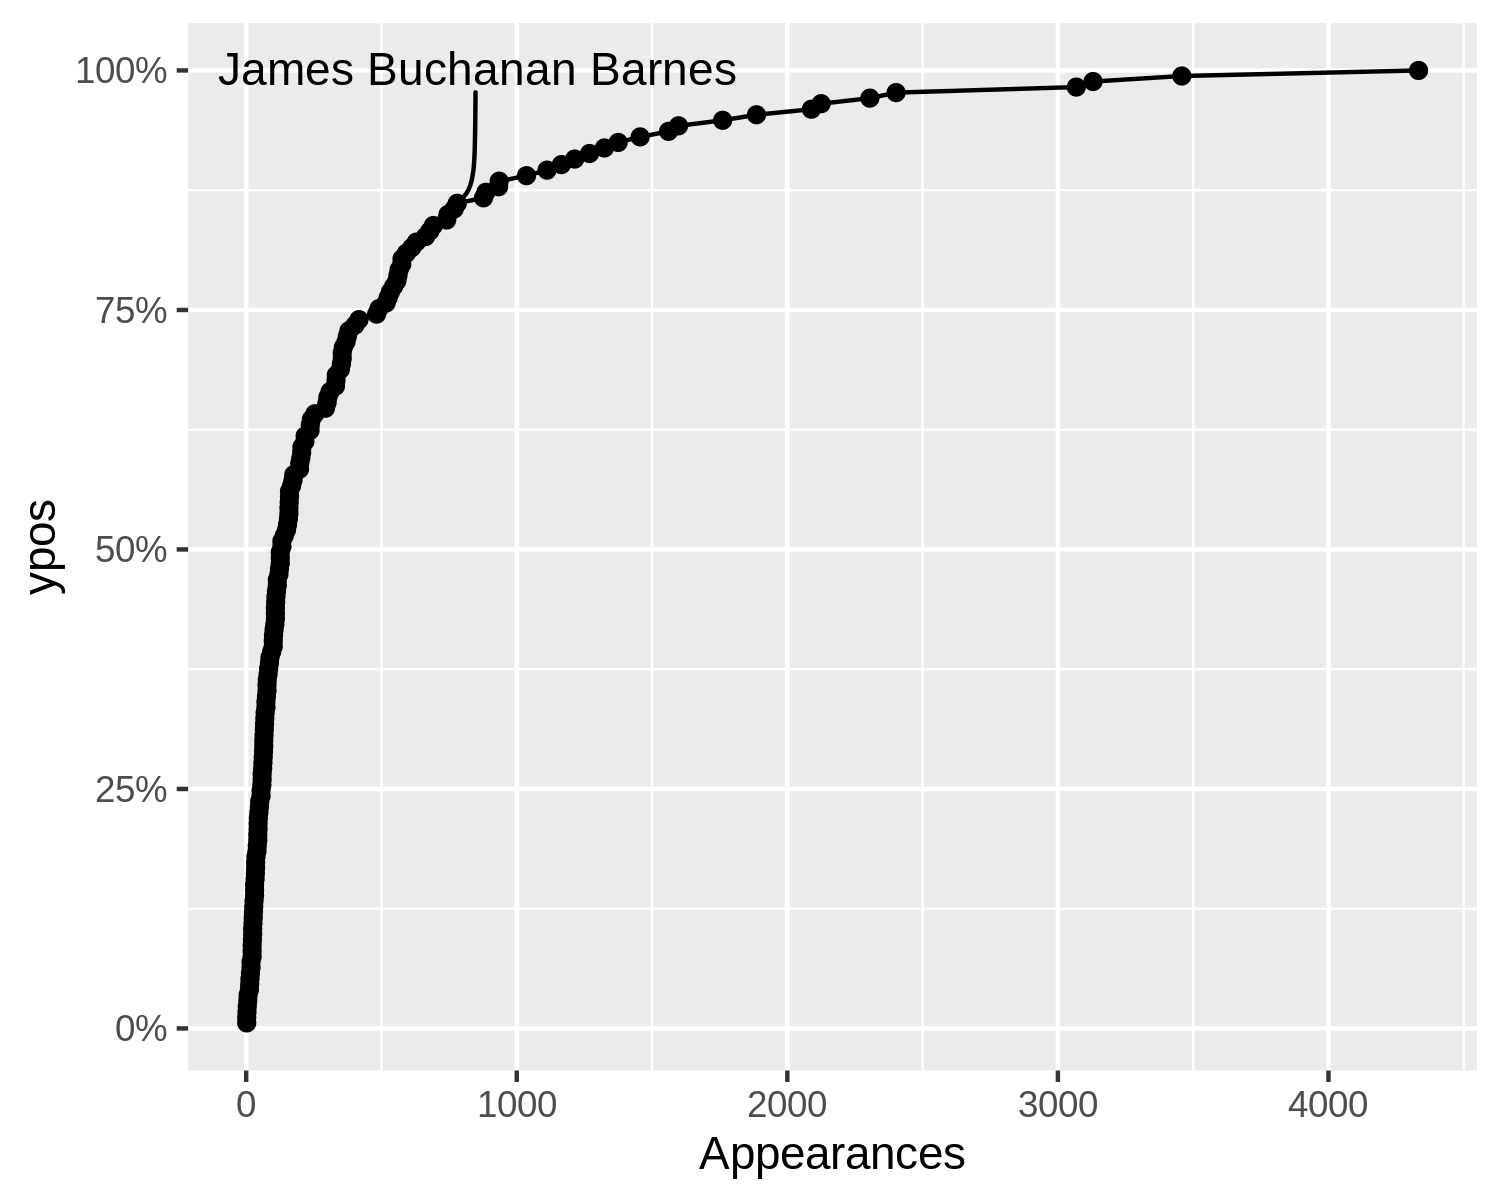

In [25]:
#add the data that we've included in the "highlight" dataset - and place it on our chart! 
library('ggrepel')

p = ggplot(avengers3, aes(x = Appearances, y = ypos)) + 
    geom_line() + 
    geom_point() + 
    geom_text_repel( 
        data = highlight, 
        mapping = aes(label = `Name/Alias`), 
        nudge_x = .15, 
        box.padding = 0.5, 
        nudge_y = 1, 
        segment.curvature = -0.1, 
        segment.ncp = 3, 
        segment.angle = 20
        ) + 
    scale_y_continuous(labels = scales::percent_format())
p